In [1]:
# fundamentals
import os, sys
import numpy as np
import pandas as pd
from calendar import monthrange, month_name
import scipy.stats as stats
import datetime as dt
import imp
from scipy import stats


# plotting libraries and setup
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
%matplotlib inline
fs = 12
plt.rc('font', family='serif')
plt.rc('font', size=fs)
plt.rc('facecolor', )

# met mast functions and utilities
sys.path.append('../')
import met_funcs as MET
import vis as vis
import utils as utils

In [2]:
# paths (must mount volume smb://nrel.gov/shared/wind/WindWeb/MetData/135mData/)
towerID = 'M5'
datapath = '../example_data/{}'.format(towerID)
figPath = '../../figs/{}'.format(towerID)
try:
    os.makedirs(figPath)
except:
    pass

# Data loading 

Data located in '../example_data/' has already been filtered orgainzed and qc'd.

If loading raw data (still needing to be qc'd and filtered), refer to 'M5_figs_process.ipyng' for proceedure.

In [3]:
fPaths = os.listdir(datapath)

for ifile, file in enumerate(fPaths):
    loadfile = os.path.join(datapath,file)
    
    temp = pd.read_csv(loadfile)
    
    if ifile==0:
        metdat = temp
    else:
        metdat = metdat.append(temp)

# Reindex with date
metdat.set_index('Date', inplace=True)
metdat.index = pd.to_datetime(metdat.index)
catinfo = MET.get_catinfo(metdat)

/Users/nhamilto/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (137,138,139,142) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/nhamilto/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/nhamilto/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [117]:
imp.reload(vis)

<module 'vis' from '../vis.py'>

In [118]:
varcol, vertloc, _= utils.get_vertical_locations(catinfo['columns']['speed'])

for col, loc in zip(varcol,vertloc):
    fig,ax = vis.hist(metdat, catinfo, 'speed', vertloc=loc, fit='Weibull')

In [7]:
catinfo['columns'].keys()

dict_keys(['air density', 'air pressure', 'air temperature', 'coherent tke', 'direction', 'gradient richardson', 'monin-obukhov length', 'relative humidity', 'speed', 'stability flag', 'stability parameter z/l', 'ti', 'turbulent kinetic energy', 'wind shear', 'wind veer'])

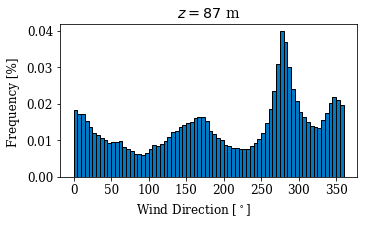

In [11]:
fig,ax = vis.hist(metdat, catinfo, 'direction', vertloc=87, bins=72)
fig.savefig('windhist_fullyear.png', dpi=200)

In [127]:
imp.reload(vis)

<module 'vis' from '../vis.py'>

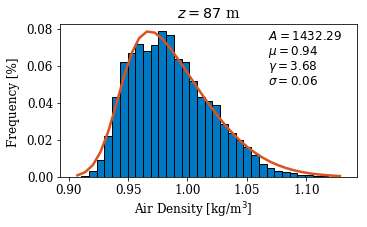

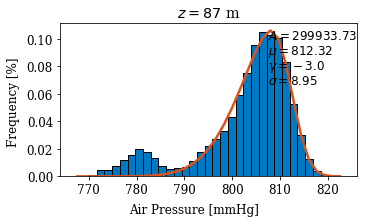

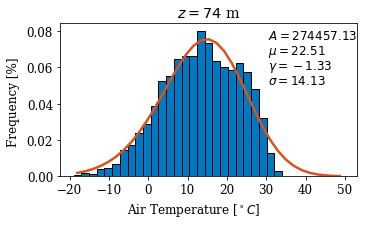

In [142]:
cats = ['air density', 'air pressure', 'air temperature']
for cat in cats:
    varcol, varheight, _ = utils.get_vertical_locations(catinfo['columns'][cat], location=87)
    fig, ax = vis.hist(metdat, catinfo, cat, bins=35, fit='skewedgaussian', labels=True)
    savecat = catinfo['save'][cat]
    catfigpath = os.path.join(figPath,savecat)
    fig.savefig(os.path.join(catfigpath,'{}_{}_hist_{}_fit.png'.format(towerID, savecat, varheight)), dpi=200, bbox_inches='tight')


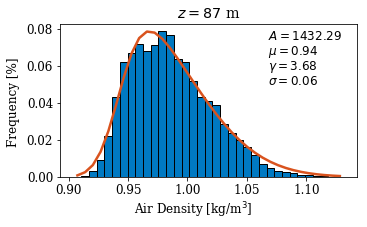

In [92]:
imp.reload(vis)
cat = 'air density'
varcol, varheight, _ = utils.get_vertical_locations(catinfo['columns'][cat], location=87)
fig, ax = vis.hist(metdat, catinfo, cat, bins=35, fit='skewedgaussian', labels=True)
fig.savefig('air_density_hist_fit_labels.png', bbox_inches='tight', dpi=200)

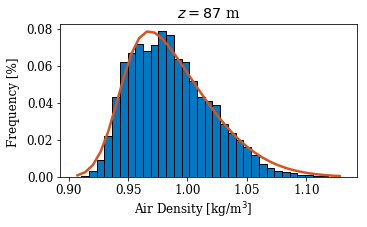

In [56]:
from lmfit.models import SkewedGaussianModel
colors = utils.get_nrelcolors()
nrelred = colors['red'][1]

cat = 'air density'

varcol, varheight, _ = utils.get_vertical_locations(catinfo['columns'][cat], location=87)
test = metdat[varcol].dropna()
yvals, xvals = np.histogram(test, bins=35)

xvals = np.array([(xvals[i]+xvals[i+1])/2 for i in range(len(xvals)-1)])
# xvals, yvals = test.hist(bins=35)

model = SkewedGaussianModel()

# set initial parameter values
params = model.make_params(amplitude=10, center=0, sigma=1, gamma=0)

# adjust parameters  to best fit data.
result = model.fit(yvals, params, x=xvals)

# print(result.fit_report())
fig, ax = vis.hist(metdat, catinfo, cat)
plt.plot(xvals, result.best_fit* 1.0/float(len(test)), color=nrelred, linewidth=2.5) 

In [16]:
fig,ax = vis.monthly_profile(metdat, catinfo, cat)

AttributeError: 'Index' object has no attribute 'month'

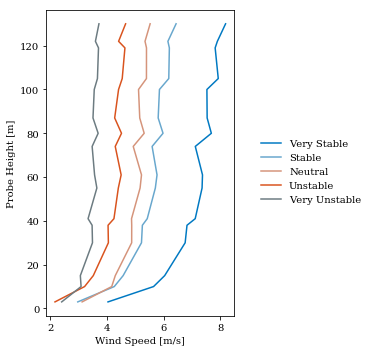

In [9]:
fig,ax = vis.stability_profile(metdat, catinfo, cat)

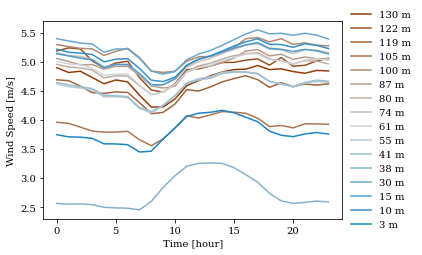

In [10]:
fig, ax = vis.hourlyplot(metdat, catinfo, cat)

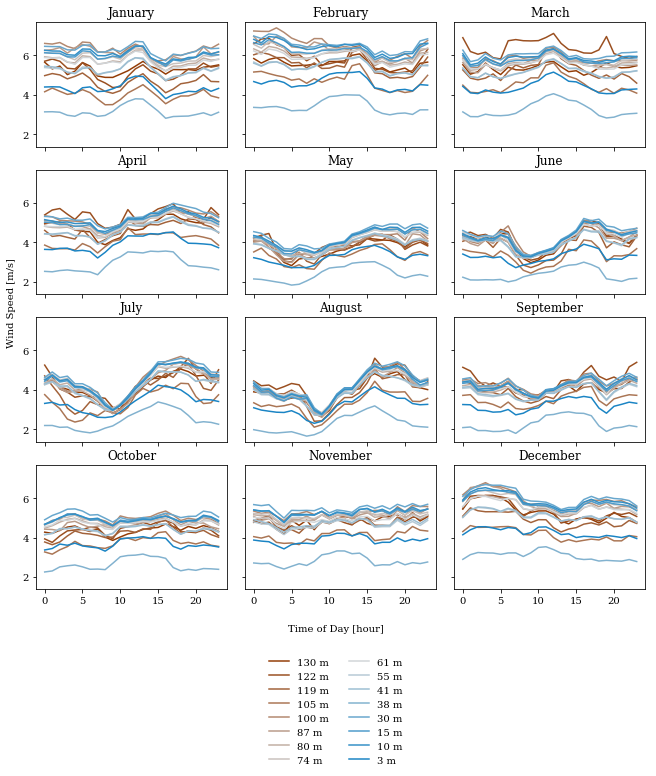

In [11]:
fig, ax = vis.monthlyhourlyplot(metdat, catinfo, cat)

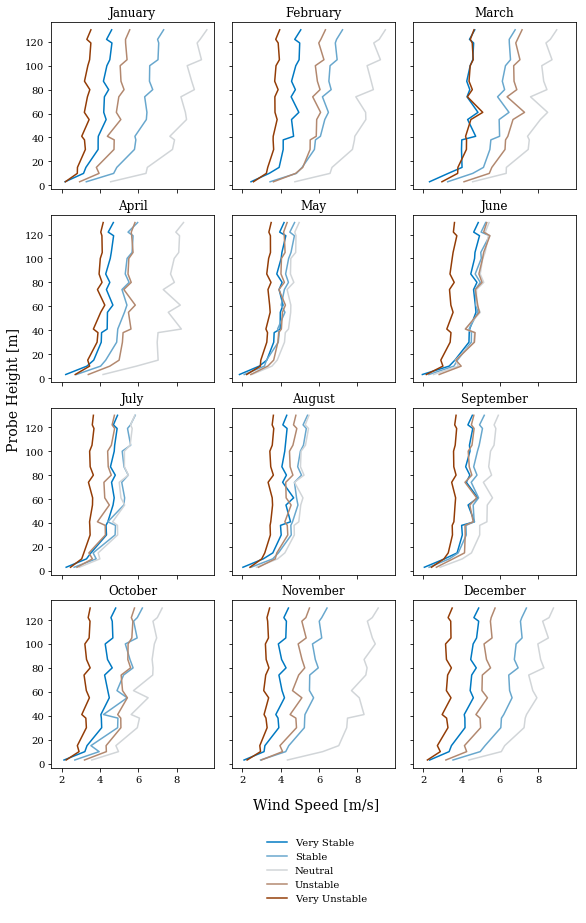

In [12]:
fig, ax, = vis.monthly_stability_profiles(metdat, catinfo, cat)

/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


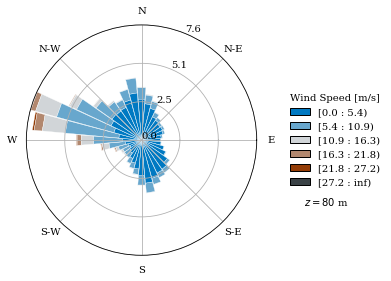

In [13]:
fig,ax,leg = vis.rose_fig(metdat, catinfo, cat)

/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


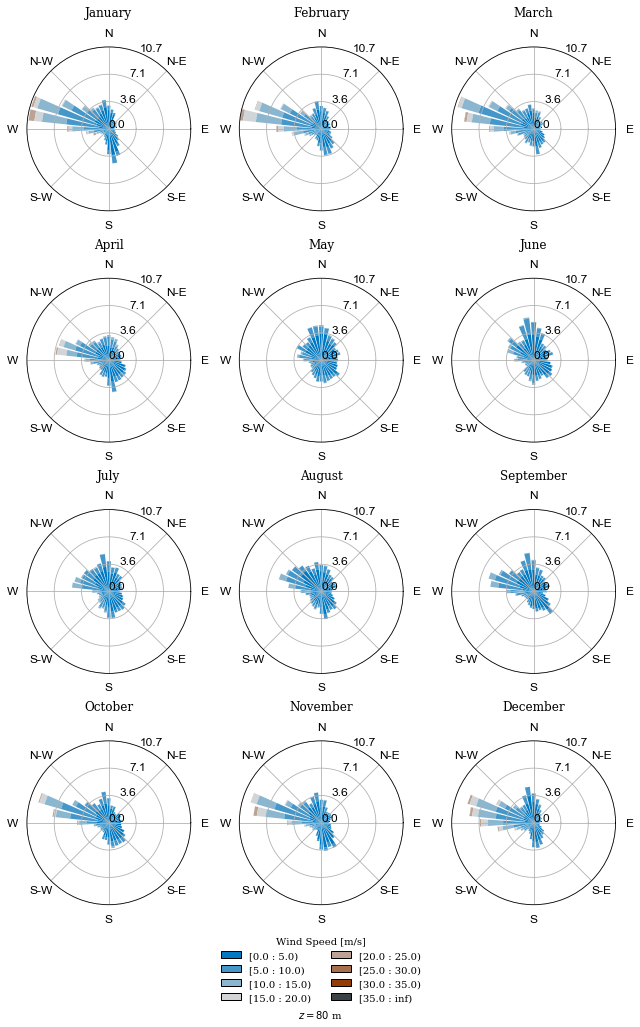

In [14]:
fig,ax,leg = vis.monthly_rose_fig(metdat, catinfo, cat, bins = [0.0,5,10,15,20,25,30,35])

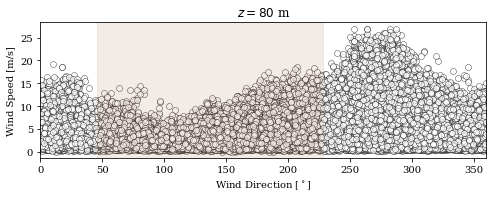

In [15]:
fig, ax = vis.winddir_scatter(metdat, catinfo, cat)

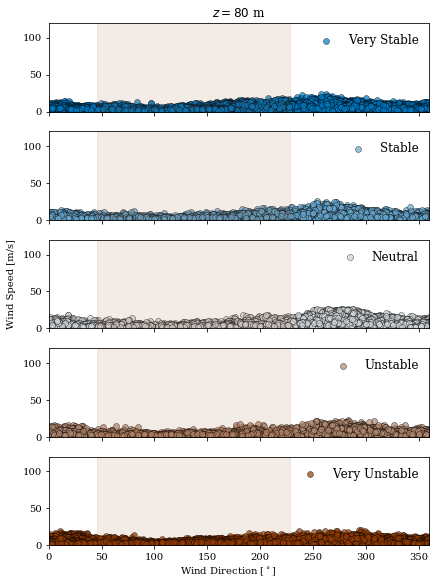

In [16]:
fig, ax = vis.stability_winddir_scatter(metdat, catinfo, cat)

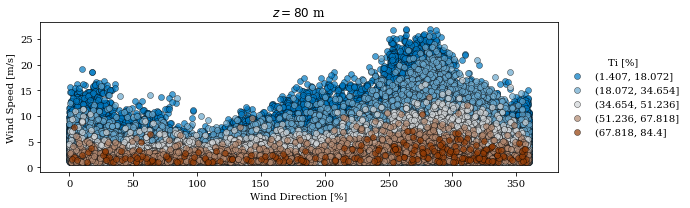

In [17]:
fig,ax = vis.groupby_scatter(metdat, catinfo, cat, 'direction', 'ti')
fig.set_size_inches(8,3)
fig.tight_layout()

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


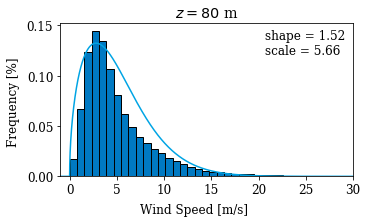

In [14]:
cat = 'speed'
fig,ax = vis.hist(metdat, catinfo, cat, fitweib=True)

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


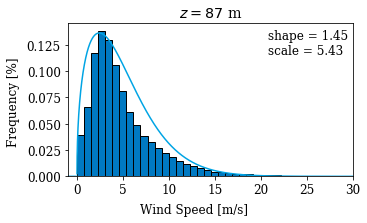

In [15]:
cat = 'speed'
fig,ax = vis.hist(metdat, catinfo, cat, vertloc=87, fitweib=True)

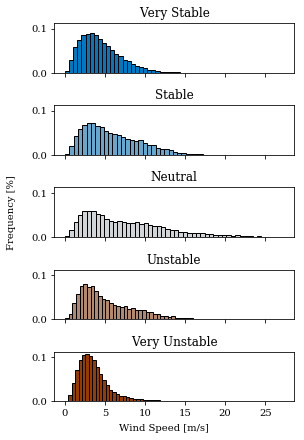

In [19]:
fig,ax = vis.hist_by_stability(metdat, catinfo, cat)

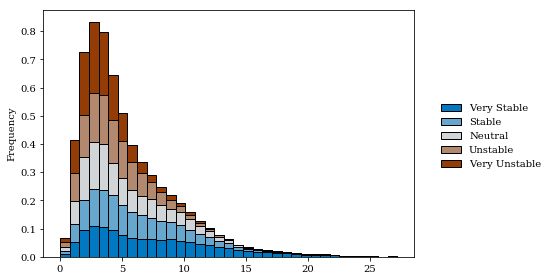

In [20]:
fig,ax = vis.stacked_hist_by_stability(metdat,catinfo,cat)

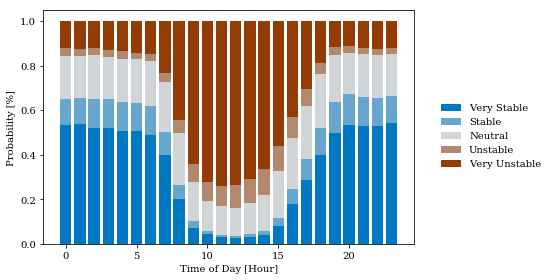

In [21]:
fig, ax = vis.normalized_hist_by_stability(metdat, catinfo)

/Volumes/Sitechar/coderepo/nicholas/vis.py:843: PerformanceWarning: indexing past lexsort depth may impact performance.
  pdat = temp.loc[ii+1,cond]


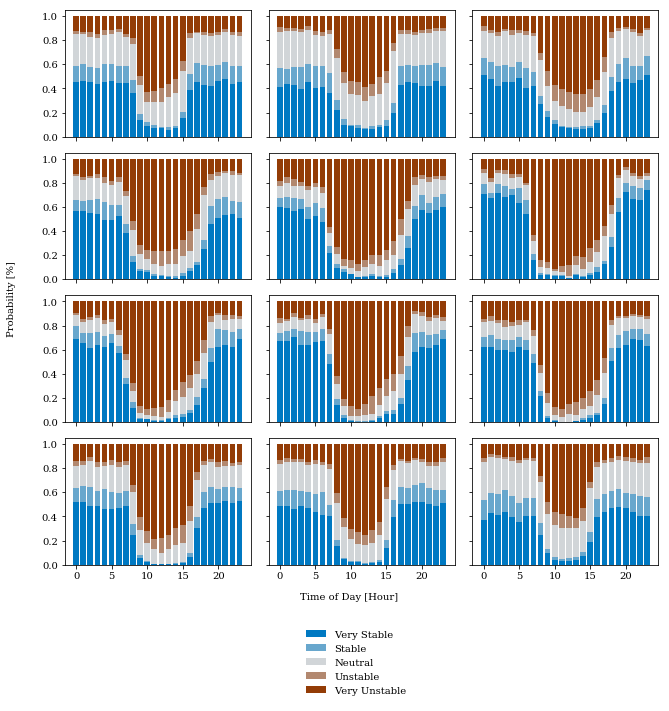

In [22]:
fig, ax = vis.normalized_monthly_hist_by_stability(metdat,catinfo)